<a href="https://colab.research.google.com/github/0324065kevin/data-analysis/blob/master/%E6%99%BA%E6%85%A7%E5%95%86%E5%8B%99%E6%9C%9F%E6%9C%AB(%E4%BD%BF%E7%94%A8Apriori%E6%BC%94%E7%AE%97%E6%B3%95)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 法國一間 retail store，在一星期內 generate 的 7500 次交易數據

In [0]:
import numpy as np
import pandas as pd
import os
# from apyori import apriori

#可以從google drive中  直接將資料匯進來z
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [0]:
#設定路徑
corpus_root = 'drive/My Drive/Colab Notebooks/datasets/' 
#選擇目標資料  轉為dataframe格式 依原始資料沒有表頭的特性   以header = None語法 設定為沒有表頭
market_Basket_df = pd.read_csv(corpus_root+'Market_Basket_Optimisation.csv', header = None)
#為了後續一部份的處理 將nan值設定為o
market_Basket_df_fillnaToZero = market_Basket_df.fillna(0)
#header = None 沒有表頭
# market_Basket_df.shape

In [0]:
market_Basket_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
market_Basket_df_fillnaToZero.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
train_data = np.array(market_Basket_df)
train_data_list = train_data.tolist()


In [0]:
# 直接從df 變np arr ，會出現形態上的錯誤 
# 搞剛一點，先轉成list，再從list變np arr就不會有問題啦
market_Basket_list = market_Basket_df.values.tolist()
market_Basket_arr = np.array(market_Basket_list)

market_Basket_arr

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [0]:
from mlxtend.preprocessing import TransactionEncoder

# 用 Transaction Encoder 轉做 Array 格式
# 由於 apriori function 要求 data 使用 pandas DataFrame格式，如果 raw data 是其他格式，則需要用 Transaction Encoder 的 fit 和 transform 轉檔。
# Transaction Encoder 可以從dataset中 learns unique items，並將每一個 transaction ( Python 的 List ) 轉變成one-hot encoded boolean Numpy array。
te = TransactionEncoder()
# 輸入的型態必須要是np arr的型態 其他是不行的啊 dtype型態上要注意啊
te_market_Basket = te.fit_transform(market_Basket_arr)

# 因為te出來的資料是沒有表頭的所以要用pd.DataFrame(data, columns = te.columns_) 讓資料與表頭結合 te後的col也是unique的
df_te_market_Basket = pd.DataFrame(te_market_Basket, columns = te.columns_)

# 可以看全部unique的表頭
te.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [0]:
# 為啥要轉成dataframe呢 因為Apriori只吃 dataframe的格式啊 而且要長得像下面那樣
df_te_market_Basket

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

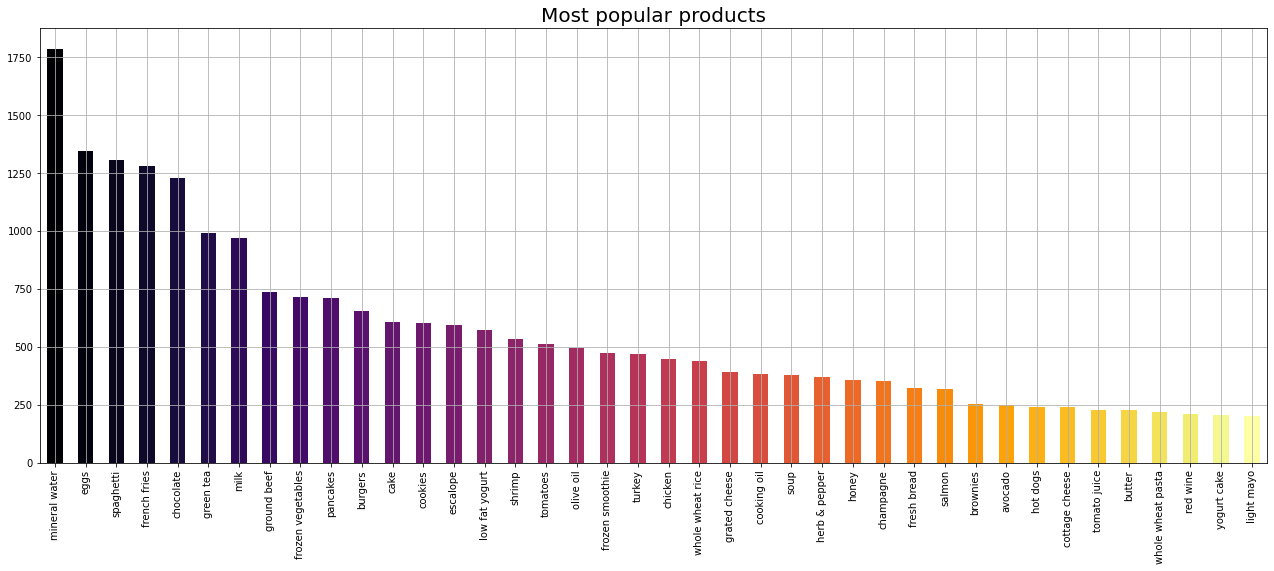

In [0]:
# looking at the frequency of most popular items 

import matplotlib.pyplot as plt
#統一畫板的大小
plt.rcParams['figure.figsize'] = (22, 8)
# plt.rcParams['font.sans-serif'] = ['simhei']
#設定color為sequential colormaps為inferno
# 每一個色調的區間為0~1 如果end設定超過1顏色的分布就會越靠前，後面的顏色就都會是色條最右邊的顏色，所以start end建議設為0~1之間
color = plt.cm.inferno(np.linspace(0, 1, 40))
#將dataframe的資料以最多的前30筆呈現
# value_counts() 可算出陣列中最常出現的資料與它的次數 並以多到少做排序
# market_Basket_df[0].value_counts().head(30).plot.bar(color = color)

# 計算所有商品在全部的資料中所出現的次數，
product_freq = (df_te_market_Basket == True).sum().drop('nan').sort_values(ascending = False)

product_freq.head(40).plot.bar(color = color)

plt.title('Most popular products', fontsize = 20)
#旋轉X軸刻度標籤
plt.xticks(rotation = 90 )
plt.grid()
plt.show()


In [0]:
product_freq.head(40)

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
burgers               654
cake                  608
cookies               603
escalope              595
low fat yogurt        574
shrimp                536
tomatoes              513
olive oil             494
frozen smoothie       475
turkey                469
chicken               450
whole wheat rice      439
grated cheese         393
cooking oil           383
soup                  379
herb & pepper         371
honey                 356
champagne             351
fresh bread           323
salmon                319
brownies              253
avocado               250
hot dogs              243
cottage cheese        239
tomato juice          228
butter                226
whole wheat pasta     221
red wine              211
yogurt cake 

In [0]:
# 假如我們想將 one-hot encoded array 還原為 transaction list，則可以用 inverse_Transform function：
# example = te.inverse_transform(te_market_Basket)
# product_freq_df

In [0]:
product_freq_df = product_freq.head(40).to_frame()
product_freq_list = product_freq_df.index.to_list()
# 取出前30名的商品資訊 並將型態轉為list
# product_freq_list

In [0]:
# 商品的種類太多了  我們適當的減少到30個 選擇的是商品之中被挑選最多的30項
# df_te_market_Basket.loc[:,[market_Basket_df[0].value_counts().head(30)]]
input_data = df_te_market_Basket[df_te_market_Basket.columns.intersection(product_freq_list)]
input_data

,avocado,brownies,burgers,butter,cake,champagne,chicken,chocolate,cookies,cooking oil,cottage cheese,eggs,escalope,french fries,fresh bread,frozen smoothie,frozen vegetables,grated cheese,green tea,ground beef,herb & pepper,honey,hot dogs,light mayo,low fat yogurt,milk,mineral water,olive oil,pancakes,red wine,salmon,shrimp,soup,spaghetti,tomato juice,tomatoes,turkey,whole wheat pasta,whole wheat rice,yogurt cake
0,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,True,False,False,True,True,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7497,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
from mlxtend.frequent_patterns import apriori
# apriori(第一格形態要為 DF 格式看上面, min_support = 自己設 , use_colnames = True)
Apriori_data = apriori(input_data, min_support = 0.03, use_colnames = True)

In [0]:
Apriori_data.sort_values(by = ['support'], ascending = False)

,support,itemsets
25,0.238368,(mineral water)
11,0.179709,(eggs)
31,0.174110,(spaghetti)
13,0.170911,(french fries)
7,0.163845,(chocolate)
18,0.132116,(green tea)
24,0.129583,(milk)
19,0.098254,(ground beef)
16,0.095321,(frozen vegetables)
27,0.095054,(pancakes)


Assign 新 column 叫 length，將 frequent_itemsets 內的 itemsets 行，apply lambda function 這個可以即時使用的 function

In [0]:
Apriori_data['length'] = Apriori_data['itemsets'].apply(lambda x : len(x))
Apriori_data

In [0]:
#假設商品最少每個禮拜最少要被購入250次  250/7500 = 0.03 
Apriori_data[ (Apriori_data['length'] == 2) &
             Apriori_data['support'] >= 0.03 ].sort_values(by = ['support'], ascending = False)

,support,itemsets,length
53,0.059725,"(spaghetti, mineral water)",2
39,0.052660,"(chocolate, mineral water)",2
43,0.050927,"(eggs, mineral water)",2
50,0.047994,"(milk, mineral water)",2
48,0.040928,"(ground beef, mineral water)",2
49,0.039195,"(ground beef, spaghetti)",2
40,0.039195,"(chocolate, spaghetti)",2
44,0.036528,"(eggs, spaghetti)",2
41,0.036395,"(french fries, eggs)",2
46,0.035729,"(frozen vegetables, mineral water)",2


In [0]:
from mlxtend.frequent_patterns import association_rules
association_rules(Apriori_data, metric = "confidence", min_threshold = 0.3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270
2,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
3,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
4,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
5,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529
6,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
